In [2]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import Hyperparameter
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
import pandas as pd
df= pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [3]:
from sklearn.model_selection import train_test_split
x ,y =df.drop('target',axis=1),df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state = 9)

### Scale-Sensitive

* Standard Scaler Classifier

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

* K-Neighbors Classifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train_scaled,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


* Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(x_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


* Support Vector Classification (SVC)

In [13]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train_scaled,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### SCALE-INSENSİTİVE

* Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=9)
forest.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


* Gradient Boosting Classifier

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(x_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


* Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)

,priors,None
,var_smoothing,1e-09


* ACCURACY

In [11]:
forest.score(x_test, y_test)

0.9853658536585366

In [12]:
gb_clf.score(x_test, y_test)

0.9707317073170731

In [13]:
nb_clf.score(x_test, y_test)

0.8463414634146341

In [19]:
knn.score(x_test_scaled,y_test)

0.8536585365853658

In [18]:
log.score(x_test_scaled,y_test)

0.8731707317073171

In [23]:
svc.score(x_test_scaled,y_test)

0.9341463414634147

In [17]:

model_ev = pd.DataFrame({
    'Model': ['Random Forest','Gradient Boost','Naive Bayes','KNN','Logistic Regression','SVC'],
    'Accuracy': [
        forest.score(x_test, y_test)*100,
        gb_clf.score(x_test, y_test)*100,
        nb_clf.score(x_test, y_test)*100,
        knn.score(x_test_scaled,y_test)*100,
        log.score(x_test_scaled,y_test)*100,
        svc.score(x_test_scaled, y_test)*100
    ]
})

model_ev


,Model,Accuracy
0,Random Forest,98.536585
1,Gradient Boost,97.073171
2,Naive Bayes,84.634146
3,KNN,85.365854
4,Logistic Regression,87.317073
5,SVC,93.414634


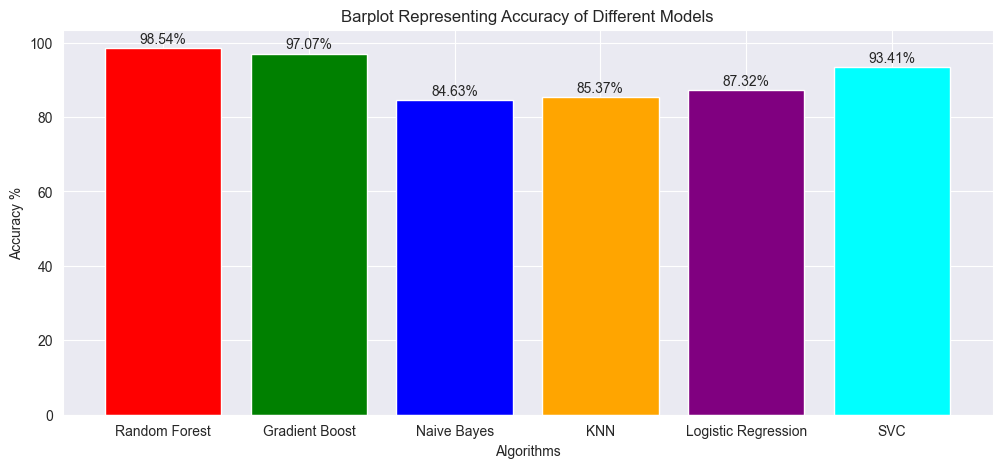

In [18]:
import matplotlib.pyplot as plt

colors = ['red','green','blue','orange','purple','cyan']

plt.figure(figsize=(12,5))
plt.title("Barplot Representing Accuracy of Different Models")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy %")

bars = plt.bar(model_ev['Model'], model_ev['Accuracy'], color=colors)

# Barların üstüne yüzdeyi yazdırma
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5,
             f"{yval:.2f}%", ha='center', va='bottom', fontsize=10)

plt.show()


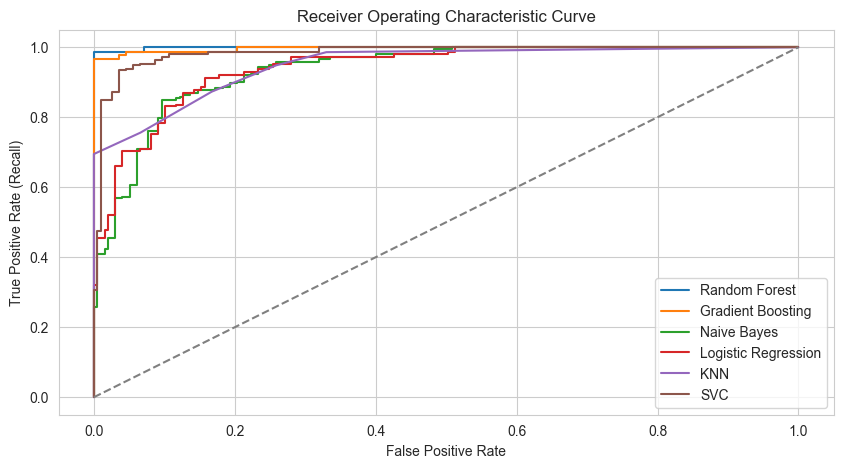

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

# Random Forest
rf_probs = forest.predict_proba(x_test)[:,1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# Gradient Boost
gb_probs = gb_clf.predict_proba(x_test)[:,1]
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)

# Naive Bayes
nb_probs = nb_clf.predict_proba(x_test)[:,1]
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

# Logistic Regression
lr_probs = log.predict_proba(x_test_scaled)[:,1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# KNN
knn_probs = knn.predict_proba(x_test_scaled)[:,1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)

# SVC (decision_function çünkü bazı kernel’lerde predict_proba yok)
svc_scores = svc.decision_function(x_test_scaled)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_scores)


# Çizim
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characteristic Curve')

plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting')
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes')
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression')
plt.plot(knn_fpr, knn_tpr, label='KNN')
plt.plot(svc_fpr, svc_tpr, label='SVC')

# Referans çizgi (rastgele sınıflandırıcı)
plt.plot([0,1], [0,1], linestyle='--', color='gray')

plt.ylabel('True Positive Rate (Recall)')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()


In [21]:
roc_auc_score(y_test,rf_probs)

0.9989990705655251

HYPERPARAMETER TUNING

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1 ,2 ,4],
    'max_features': ['sqrt' ,'log2', None] }
forest = RandomForestClassifier(n_jobs=-1 ,random_state=9)
grid_search = GridSearchCV(forest, param_grid, cv=3, n_jobs=-1, verbose=2)

In [23]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


,estimator,RandomForestC...andom_state=9)
,param_grid,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,500


In [24]:
forest = grid_search.best_estimator_

In [25]:
forest

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
forest.score(x_test, y_test)

0.9853658536585366

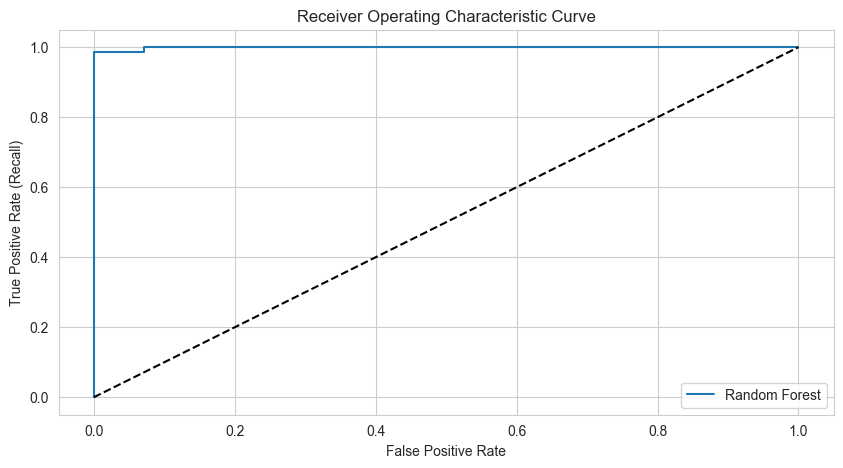

In [27]:
rf_probs = forest.predict_proba(x_test)[:,1]

rf_false_positive_rate, rf_true_positive_rate, rf_threshold = roc_curve(y_test, rf_probs)
# Çizim
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characteristic Curve')

plt.plot(rf_false_positive_rate, rf_true_positive_rate, label='Random Forest')
# Referans çizgileri
plt.plot([0,1],[0,1],'k--')

plt.ylabel('True Positive Rate (Recall)')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

FEATURE IMPORTANCES

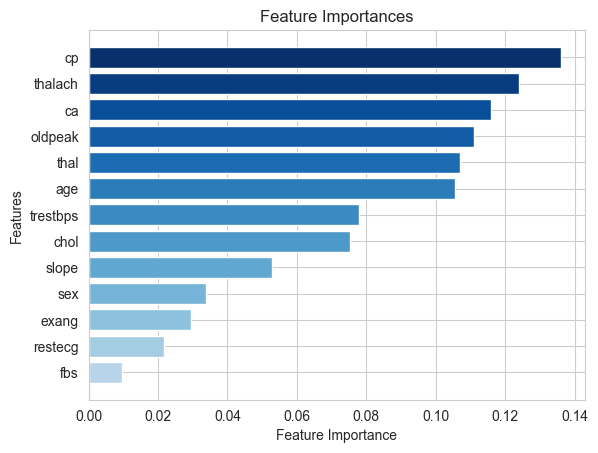

In [28]:
feature_importances = forest.feature_importances_
features = forest.feature_names_in_

sorted_idx = np.argsort(feature_importances)
sorted_features = features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

colors = plt.cm.Blues(np.linspace(0.3,1,len(sorted_features)))

plt.barh(sorted_features, sorted_importances, color=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')

plt.show()

<Axes: >

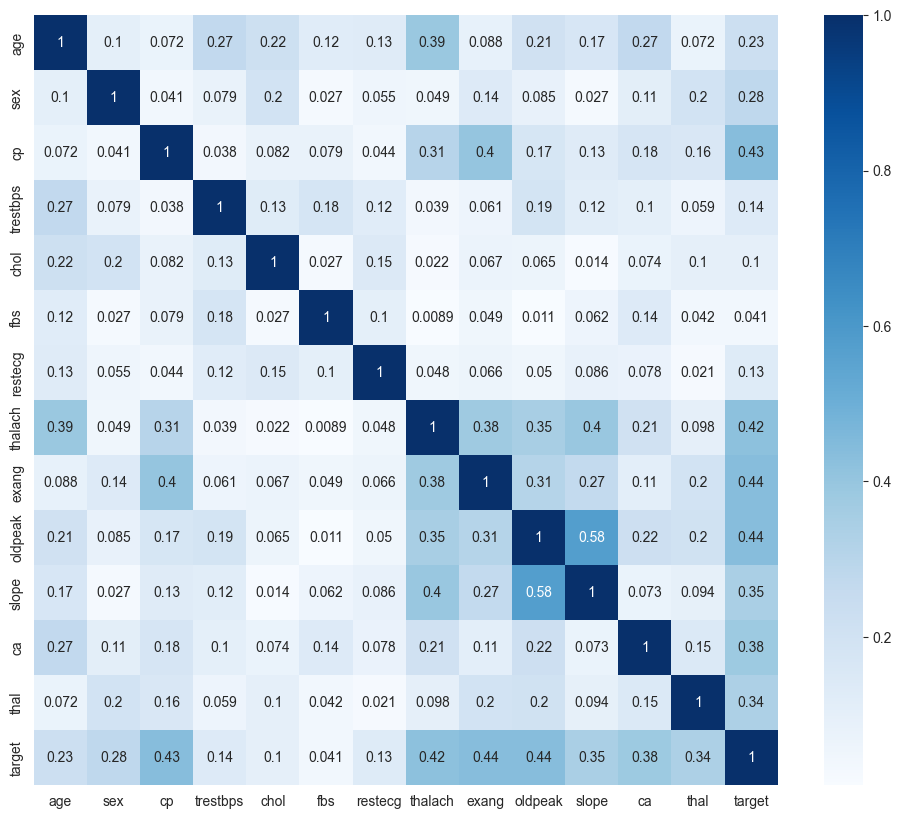

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(abs(df.corr()), annot=True, cmap='Blues')

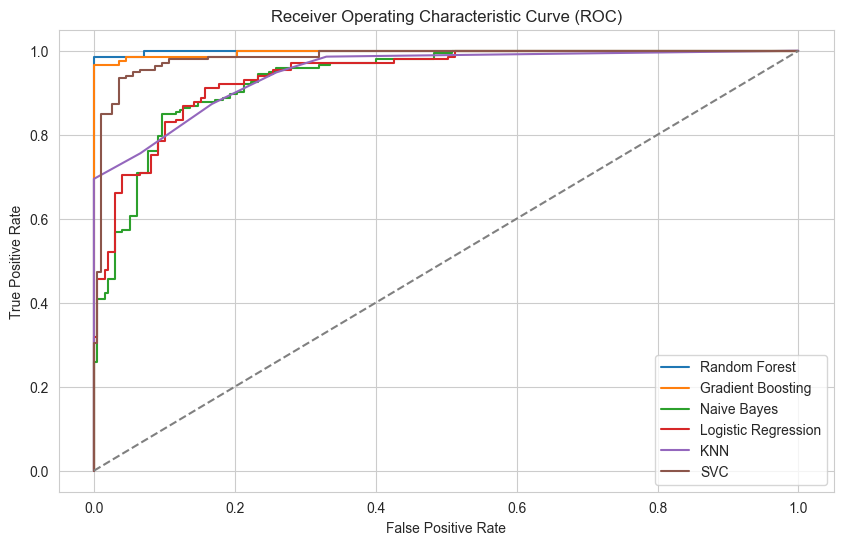

In [25]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest
rf_probs = forest.predict_proba(x_test)[:,1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# Gradient Boost
gb_probs = gb_clf.predict_proba(x_test)[:,1]
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)

# Naive Bayes
nb_probs = nb_clf.predict_proba(x_test)[:,1]
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

# Logistic Regression
lr_probs = log.predict_proba(x_test_scaled)[:,1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# KNN
knn_probs = knn.predict_proba(x_test_scaled)[:,1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)

# SVC (decision_function çünkü bazı kernel’lerde predict_proba yok)
svc_scores = svc.decision_function(x_test_scaled)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_scores)

# Plot
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characteristic Curve (ROC)')

plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting')
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes')
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression')
plt.plot(knn_fpr, knn_tpr, label='KNN')
plt.plot(svc_fpr, svc_tpr, label='SVC')

# Referans çizgi (rastgele sınıflandırıcı)
plt.plot([0,1], [0,1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


FEATURE IMPORTANCES COMPARISON (6 MODEL)

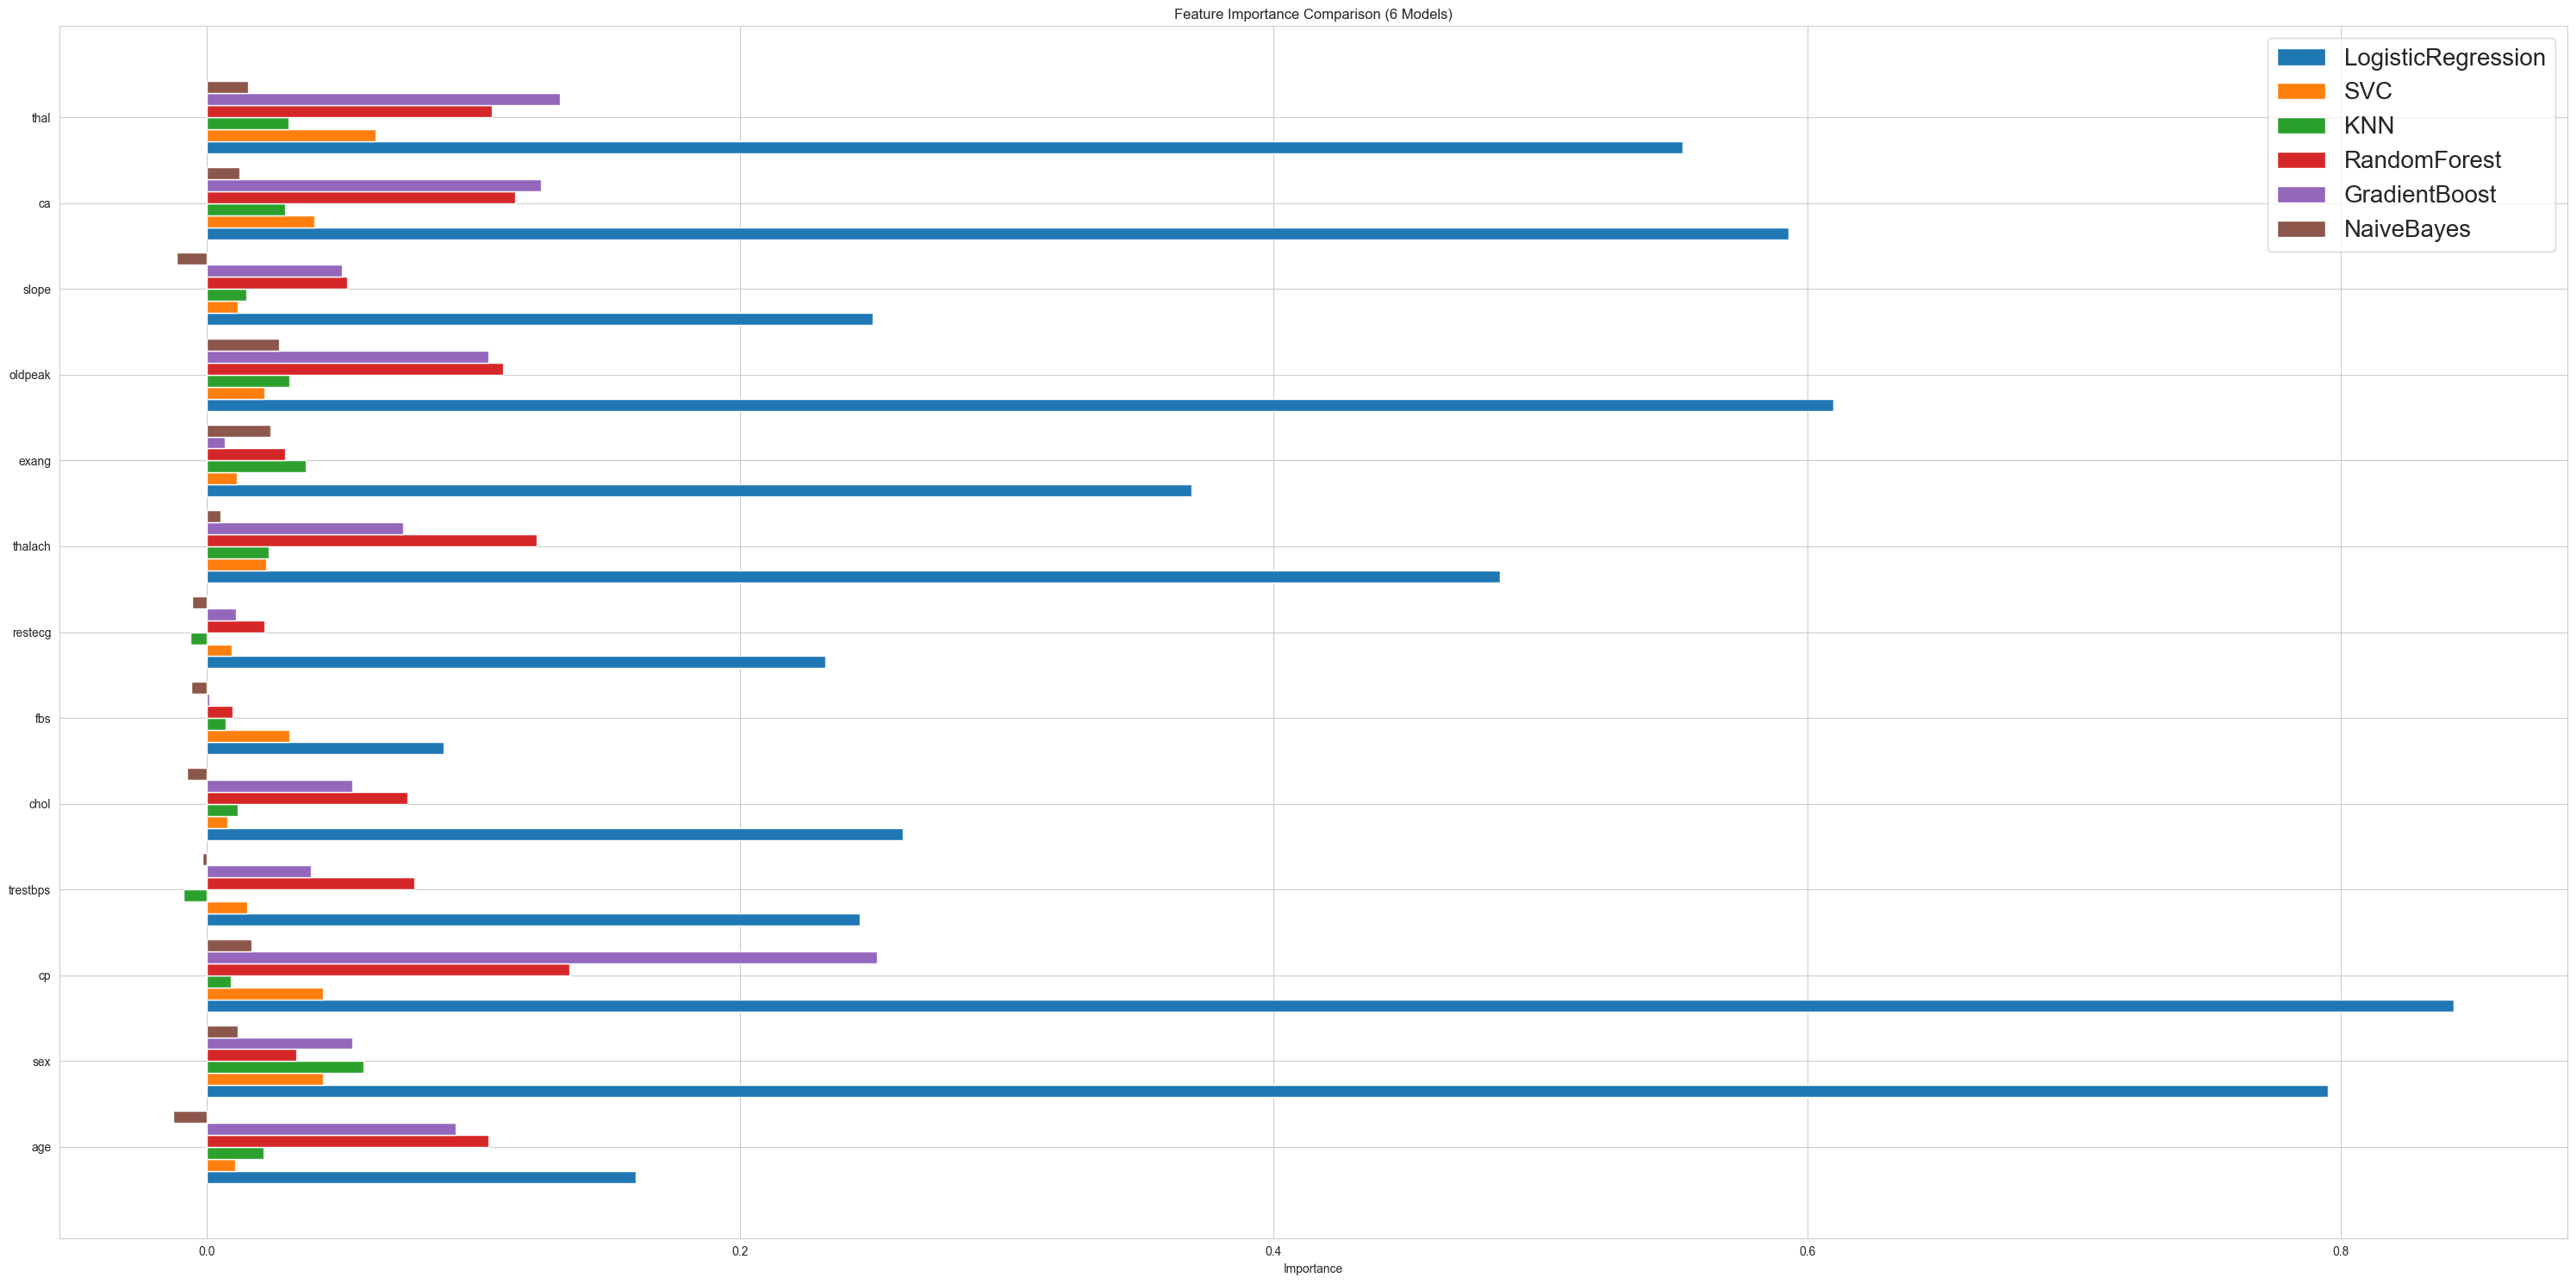

In [32]:
from sklearn.inspection import permutation_importance

features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
            'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
            'ca', 'thal']

# Logistic Regression
log_imp = abs(log.coef_[0])

# SVC (Permutation Importance)
svc_result = permutation_importance(svc, x_test_scaled, y_test, n_repeats=20, random_state=9)
svc_imp = svc_result.importances_mean

# KNN (Permutation Importance)
knn_result = permutation_importance(knn, x_test_scaled, y_test, n_repeats=20, random_state=9)
knn_imp = knn_result.importances_mean

# Random Forest
rf_imp = forest.feature_importances_

# Gradient Boosting
gb_imp = gb_clf.feature_importances_

# Naive Bayes (Permutation Importance ile)
nb_result = permutation_importance(nb_clf, x_test, y_test, n_repeats=20, random_state=9)
nb_imp = nb_result.importances_mean

# Tek DataFrame
data_imp = pd.DataFrame({
    'Feature': features,
    'LogisticRegression': log_imp,
    'SVC': svc_imp,
    'KNN': knn_imp,
    'RandomForest': rf_imp,
    'GradientBoost': gb_imp,
    'NaiveBayes': nb_imp
})

# Grafik (yan yana barlar)
x = np.arange(len(features))  # feature sayısı
width = 0.14  # bar genişliği (6 model için küçültüldü)

plt.figure(figsize=(30,15))
plt.barh(x - 2.5*width, data_imp['LogisticRegression'], height=width, label='LogisticRegression')
plt.barh(x - 1.5*width, data_imp['SVC'], height=width, label='SVC')
plt.barh(x - 0.5*width, data_imp['KNN'], height=width, label='KNN')
plt.barh(x + 0.5*width, data_imp['RandomForest'], height=width, label='RandomForest')
plt.barh(x + 1.5*width, data_imp['GradientBoost'], height=width, label='GradientBoost')
plt.barh(x + 2.5*width, data_imp['NaiveBayes'], height=width, label='NaiveBayes')

plt.yticks(x, data_imp['Feature'])
plt.xlabel("Importance")
plt.title("Feature Importance Comparison (6 Models)")
# Legend’i grafiğin içinde bırak, sadece yazı boyutu büyüsün
plt.legend(loc='upper right', prop={'size':20})
plt.tight_layout()
plt.show()
